
# **File to Augment Data**
---

In [0]:
import keras 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import imutils
import cv2
import PIL.Image
import os
%matplotlib inline

demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

Using TensorFlow backend.


In [0]:
#make dir
def mkdir():
  os.mkdir('testfolder')
  #os.mkdir('testfolder1')

  os.mkdir('testfolder_output')
  #os.mkdir('testfolder_output1')
mkdir()  

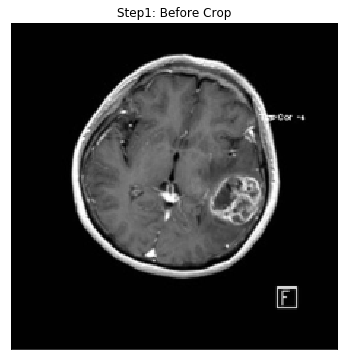

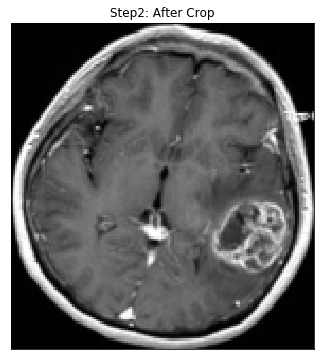

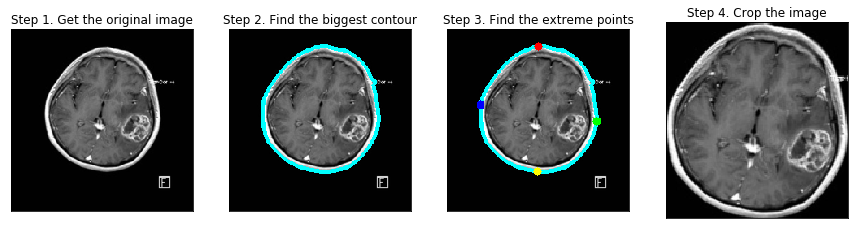

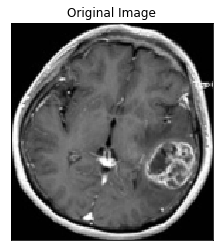

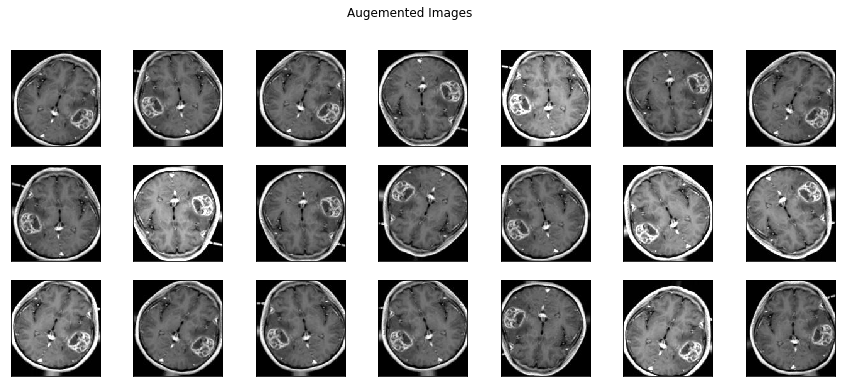

In [0]:
def cropAndAugmentation():
  #Augmentation Code
  flag1  = 0
  flag2  = 0
  j = 0
  IMG_SIZE = 224
  dim = (IMG_SIZE, IMG_SIZE)
  #directory = ["testfolder"]
  #Do for each tumor individually
  directory = ['Test-glioma'] #, 'Test-meningioma', 'Test-no_tumor', 'Test-pituitary']
  #directory = ['Train-glioma'] #, 'Train-meningioma', 'Train-no_tumor', 'Train-pituitary']
  # add pictures to testfolder
  #directory_output = ["testfolder_output"]
  directory_output = ['Test-glioma-output'] #, 'Test-meningioma-output','Test-no_tumor-output','Test-pituitary-output']
  #directory_output = ['Train-glioma-output'] #, 'Train-meningioma-output','Train-no_tumor-output','Train-pituitary-output']


  for input_folder in directory:
    for output_folder in directory_output:  

      for img in os.listdir('{}/'.format(input_folder)):
        
        image = cv2.cv2.imread('{}/'.format(input_folder) + img)


        #image = cv2.resize(image, dim, interpolation = cv2.INTER_CUBIC)
        image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
        #interpolation = INTER_CUBIC
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        
        #print original image
       # '''  # Comment this section during execution
        if flag1==0:
          plt.figure(figsize=(15,6))
          plt.imshow(image)
          plt.xticks([])
          plt.yticks([])
          plt.title('Step1: Before Crop')
          plt.show()
          flag1=1
        # '''  

        #CROP---------------------------------------------------------------------   
        #img = cv2.imread('Y1.jpg')
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)
      

        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # find the extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        # add contour on the image
        img_cnt = cv2.drawContours(image.copy(), [c], -1, (0, 255, 255), 4)

        # add extreme points
        img_pnt = cv2.circle(img_cnt.copy(), extLeft, 5, (0, 0, 255), -1)
        img_pnt = cv2.circle(img_pnt, extRight, 5, (0, 255, 0), -1)
        img_pnt = cv2.circle(img_pnt, extTop, 5, (255, 0, 0), -1)
        img_pnt = cv2.circle(img_pnt, extBot, 5, (255, 255, 0), -1)

        # apply crop
        ADD_PIXELS = 0
        new_image = image[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

        # print after crop
       # '''  # Comment this section during execution
        if flag2==0:
          plt.figure(figsize=(15,6))
          plt.imshow(new_image)
          plt.xticks([])
          plt.yticks([])
          plt.title('Step2: After Crop')
          plt.show()
         #plot_crops()
          flag2=1
       # '''  

        #Display crops----------------------------------------------------------
        #def plot_crops()
        # '''  # Comment this section during execution
        plt.figure(figsize=(15,6))
        plt.subplot(141)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        plt.title('Step 1. Get the original image')
        plt.subplot(142)
        plt.imshow(img_cnt)
        plt.xticks([])
        plt.yticks([])
        plt.title('Step 2. Find the biggest contour')
        plt.subplot(143)
        plt.imshow(img_pnt)
        plt.xticks([])
        plt.yticks([])
        plt.title('Step 3. Find the extreme points')
        plt.subplot(144)
        plt.imshow(new_image)
        plt.xticks([])
        plt.yticks([])
        plt.title('Step 4. Crop the image')
        plt.show()
        # '''  
    
        ## AUGMENTATION STARTS HERE---------------------------------------------
        x = new_image
        #x = cv2.resize(x, dim)
        x = x.reshape((1,) + x.shape)
        i = 0

        # Save data to folder testfolder_output
        for batch in demo_datagen.flow(x, batch_size=1, save_to_dir='{}'.format(output_folder), save_prefix='{}_{}'.format(input_folder,j), save_format='jpg'):
          
          i += 1
          if i > 20:
              break 
          j+=1  

        # '''  # Comment this section during execution
        plt.imshow(x[0])
        plt.xticks([])
        plt.yticks([])
        plt.title('Original Image')
        plt.show()

        plt.figure(figsize=(15,6))
       
        i = 1
        for img in os.listdir('testfolder_output/'):
            img = cv2.cv2.imread('testfolder_output/' + img)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(3,7,i)
            plt.imshow(img)
            plt.xticks([]) 
            plt.yticks([])
            i += 1
            if i > 3*7:
                break
        plt.suptitle('Augemented Images')
        plt.show()
        # '''


cropAndAugmentation()
